# The Office Text Generator

## Introduction
This notebook is for a school project on software development at KEA - Copenhagen school of design nd tecnology.

### Research question

Is it possible with AI to generate lines for characters from the tv-series ‘The Office’ and successfully imitate the personality of the characters? 
* How can we scientifically justify what is a successful imitation of a character?
* Which parameters can we use to measure the performance of the text generator?


### Approach / Methods
* Data Cleaning
* Data Analysis (EDA)
    - Word count
    - Get top word
    - Bleeped words (som are stored as an actions and some as line)
* PCA
    - Show 2 dimensional data with bleeped words and word count
* Text Generation

### Characthers list
* Characther that in atleast 50% of the entiere tv-show (16 characthers)
>['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
* Top 5 Characthers
> ['Dwight', 'Pam', 'Jim', 'Andy', 'Michael']

## Data Extraction

In [1]:
import pandas as pd
import os
import re
import pickle

### Getting Data
Extract the data from excel file - the-office-lines.xlsx

In [2]:
directory = os.getcwd()
data = pd.read_excel(directory + '/the-office-lines.xlsx')
df =  pd.DataFrame(data, columns=['speaker', 'line_text'])

df.head()

speaker                                          line_text
0  Michael  All right Jim. Your quarterlies look very good...
1      Jim         Oh, I told you. I couldn't close it. So...
2  Michael  So you've come to the master for guidance? Is ...
3      Jim         Actually, you called me in here, but yeah.
4  Michael    All right. Well, let me show you how it's done.

#### Getting Transcripts
Creating a transcript file for each character in the choosen characther list
* mkdir Transcripts

In [3]:
mkdir Transcripts

In [4]:
top16Char = ['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
top5Char = ['Andy', 'Dwight', 'Jim', 'Michael', 'Pam']

In [5]:
for index, row in df.iterrows():
    if row['speaker'] in top5Char:
        speaker = row['speaker']
        with open('Transcripts/%s_transcript' %speaker + '.txt', 'a') as f:
            f.write(str(row['line_text']))
print('Transcripts extracted from excel file')

Transcripts extracted from excel file


#### Storing Actions
Extract actions from characters transcript files in the directory Transcripts,
and pickle them to at new actions file

We store the actions so that we later can extract all the bleeped actions
* mkdir Actions

In [6]:
mkdir Actions

In [7]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.findall(r'\[.*?\]', line)
        if not len(res) == 0:
            with open('Actions/%s_actions' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Storing Lines
Extract Lines from characters transcript files in the directory Transcripts,
and pickle them to at new lines file
* mkdir Lines

In [8]:
mkdir Lines

In [9]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.sub(r'\[.*?\]', '', line)
        if not len(res) == 0:
            with open('Lines/%s_lines' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Loading the pickeled actions and line
Actions

In [10]:
actions = {}
for i, char in enumerate(top5Char):
    with open('Actions/%s_actions' %char + ".txt", "rb") as file:
        actions[char] = pickle.load(file)

In [11]:
actions.keys()

dict_keys(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'])

Lines

In [12]:
lines = {}
for i, char in enumerate(top5Char):
    with open('Lines/%s_lines' %char + ".txt", "rb") as file:
        lines[char] = pickle.load(file)

In [13]:
lines.keys()

dict_keys(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'])

## Data Cleaning

In [14]:
import pandas as pd
import string

##### Combine fuction

In [15]:
# combine
def combine_text(list_of_text):
    combined_text = "".join(list_of_text)
    return combined_text

#### Cleaning actions fuction

In [16]:
# cleaing technique actions
def clean_actions(text):
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[,]", '', text)
    text = re.sub('["]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    return text

actions_clening = lambda x: clean_actions(x)

#### Cleaning round 1 fuction for lines

In [17]:
# cleaing technique round 1
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    
    return text

round1 = lambda x: clean_text_round1(x)

#### Cleaning round 2 fuction

In [18]:
# cleaing technique round 2
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
   
    return text

round2 = lambda x: clean_text_round2(x)

#### Actions cleaning
* combine
* pandas dataframe
* cleaning techniques round 1

In [19]:
# combine
actions_combined = {key: [combine_text(value)] for (key, value) in actions.items()}
#actions_combined

In [20]:
# padas dataframe
pd.set_option('max_colwidth',150)

actions_df = pd.DataFrame.from_dict(actions_combined).transpose()
actions_df.columns = ['actions']
actions_df = actions_df.sort_index()
actions_df

actions
Andy     ['[Robert smiles as Andy exits]', '[Shoves Creed with his foot, Creed grunts]', '[To Oscar]', '[to Robert California]', '[laughs]', '[sips]', '[Ji...
Dwight   ['[singing]', '[Imitates heavy drumming]', '[Imitates heavy drumming]', '[points to Ryan]', '[new take]', '[does a martial arts move with his hand...
Jim      ['[crosses fingers]', '[Dwight begins smashing pencils with his phone]', '[scratches head]', '[Car horn honking]', '[looks at camera]', '[Shedder ...
Michael  ['[on the phone]', '[quick cut scene]', '[hangs up]', '[Clears throat]', '[growls]', "[shows the camera his WORLD'S BEST BOSS mug]", '[Strains, gr...
Pam      ['[Laughs]', '[Laughing]', '[stirs]', '[nods toward camera]', '[laughs]', '[on phone]', '[Dwight laughs]', '[whispering]', '[on her cell phone]', ...

In [21]:
# cleaing technique round 1
actions_clean = pd.DataFrame(actions_df.actions.apply(actions_clening))
actions_clean

actions
Andy       robert smiles as andy exits   shoves creed with his foot creed grunts   to oscar   to robert california   laughs   sips   jim raises hand   gets...
Dwight     singing   imitates heavy drumming   imitates heavy drumming   points to ryan   new take   does a martial arts move with his hands   talking over...
Jim        crosses fingers   dwight begins smashing pencils with his phone   scratches head   car horn honking   looks at camera   shedder whirring   power...
Michael    on the phone   quick cut scene   hangs up   clears throat   growls   shows the camera his worlds best boss mug   strains grunts   walking out of...
Pam        laughs   laughing   stirs   nods toward camera   laughs   on phone   dwight laughs   whispering   on her cell phone   gives meredith her card   ...

In [22]:
# cleaing technique round 2
actions_clean = pd.DataFrame(actions_clean.actions.apply(round2))
#actions_clean

#### Lines cleaning
* combine
* pandas dataframe
* cleaning techniques round 1 and 2

In [23]:
# combine
lines_combined = {key: [combine_text(value)] for (key, value) in lines.items()}
#lines_combined

In [24]:
# pandas dataframe
pd.set_option('max_colwidth',150)

lines_df = pd.DataFrame.from_dict(lines_combined).transpose()
lines_df.columns = ['lines']
lines_df = lines_df.sort_index()
lines_df

lines
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....

In [25]:
# cleaing technique round 1
lines_clean = pd.DataFrame(lines_df.lines.apply(round1))
lines_clean

lines
Andy     robert  i said winners and losers  is that what youre talking about oh  that  it might  that might actually be what im thinking of  can you clarif...
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...

In [26]:
# cleaing technique round 2
lines_clean = pd.DataFrame(lines_clean.lines.apply(round2))
lines_clean

lines
Andy     robert  i said winners and losers  is that what youre talking about oh  that  it might  that might actually be what im thinking of  can you clarif...
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...

## Organize Lines Data 


#### Corpus Lines

* mkdir pickle

In [27]:
mkdir pickle

In [28]:
char_names = ['Andy Bernard', 'Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly']
lines_df['Characters'] = char_names
lines_df

lines  \
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...   
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   

             Characters  
Andy       Andy Bernard  
Dwight   Dwight Schrute  
Jim         Jim Halpert  
Michael   Michael Scott  
Pam          Pam Beesly

In [29]:
# Let's pickle it for later use
lines_df.to_pickle("pickle/lines_corpus.pkl")

#### Document-Term Matrix

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
lines_cv = cv.fit_transform(lines_clean.lines)
lines_dtm = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_dtm.index = lines_clean.index
lines_dtm

aa  aaaaaaaa  aaaaaand  aaaaah  aaaaeeexcellent  aaaagh  aaaah  \
Andy      0         0         0       0                0       0      0   
Dwight    1         6         0       1                0       1      2   
Jim       0         0         0       0                0       0      0   
Michael   0         2         1       0                1       0      1   
Pam       0         0         0       0                0       0      0   

         aaaahh  aaaahhh  aaaall  ...  zombie  zombies  zone  zoning  zoo  \
Andy          0        0       0  ...       0        0     1       1    0   
Dwight        0        0       0  ...       3        1     3       1    3   
Jim           0        0       0  ...       2        1     1       0    0   
Michael       2        1       1  ...       0        1    11       1    1   
Pam           0        0       0  ...       0        0     0       0    0   

         zoom  zooms  zoppity  zoran  zuckerberg  
Andy        0      0        0      0           0  
Dwight      0      0        0      1           1  
Jim         0      0        0      0           0  
Michael     5      1        2      0           0  
Pam         0      0        0      0           0  

[5 rows x 15518 columns]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
actions_cv = cv.fit_transform(actions_clean.actions)
actions_dtm = pd.DataFrame(actions_cv.toarray(), columns=cv.get_feature_names())
actions_dtm.index = actions_clean.index
actions_dtm

aback  abby  abruptly  absolutely  accent  accepts  accidentally  \
Andy         0     0         0           0       4        0             0   
Dwight       0     2         1           0       9        0             1   
Jim          0     3         1           0       3        0             0   
Michael      1     1         0           1      20        1             1   
Pam          0     0         0           0       3        1             0   

         account  accountants  accounting  ...  youre  youtube  yuck  zeke  \
Andy           0            0           1  ...      0        0     0     0   
Dwight         1            1           0  ...      3        0     0     1   
Jim            0            0           0  ...      0        0     0     0   
Michael        0            0           0  ...      0        2     1     0   
Pam            0            0           0  ...      0        0     0     0   

         zipper  zipping  zips  zone  zooms  zwarte  
Andy          0        0     0     0      1       0  
Dwight        1        0     0     0      1       1  
Jim           0        0     0     0      0       0  
Michael       1        1     2     1      3       0  
Pam           0        0     0     0      0       0  

[5 rows x 3481 columns]

## Exploratory Data Analysis

### Most Common Words

In [32]:
lines_dtm.to_pickle("pickle/lines_dtm.pkl")
actions_dtm.to_pickle("pickle/actions_dtm.pkl")

In [33]:
lines_clean.to_pickle("pickle/lines_clean.pkl")

In [34]:
lines = pd.read_pickle('pickle/lines_dtm.pkl')
lines = lines.transpose()
lines.head()

Andy  Dwight  Jim  Michael  Pam
aa                  0       1    0        0    0
aaaaaaaa            0       6    0        2    0
aaaaaand            0       0    0        1    0
aaaaah              0       1    0        0    0
aaaaeeexcellent     0       0    0        1    0

In [35]:
actions = pd.read_pickle('pickle/actions_dtm.pkl')
actions = actions.transpose()

In [36]:
top_dict = {}
for c in lines.columns:
    top = lines[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Andy': [('just', 200),
  ('im', 190),
  ('know', 146),
  ('yeah', 123),
  ('like', 122),
  ('right', 110),
  ('dont', 104),
  ('oh', 91),
  ('guys', 80),
  ('youre', 78),
  ('got', 75),
  ('going', 74),
  ('hey', 74),
  ('thats', 73),
  ('think', 68),
  ('really', 67),
  ('good', 63),
  ('gonna', 62),
  ('uh', 57),
  ('time', 56),
  ('want', 55),
  ('mean', 53),
  ('need', 53),
  ('did', 53),
  ('great', 51),
  ('say', 50),
  ('ok', 49),
  ('erin', 49),
  ('yes', 47),
  ('thank', 46)],
 'Dwight': [('im', 492),
  ('oh', 475),
  ('know', 420),
  ('dont', 402),
  ('just', 395),
  ('okay', 350),
  ('like', 333),
  ('jim', 320),
  ('youre', 307),
  ('michael', 305),
  ('thats', 282),
  ('right', 273),
  ('good', 249),
  ('yeah', 247),
  ('come', 234),
  ('yes', 234),
  ('hey', 229),
  ('going', 207),
  ('got', 206),
  ('want', 188),
  ('ok', 182),
  ('did', 180),
  ('need', 178),
  ('really', 178),
  ('gonna', 165),
  ('think', 160),
  ('time', 155),
  ('say', 153),
  ('lets', 145),
  ('h

In [37]:
# Print the top 15 words said by each character
for character, top_words in top_dict.items():
    print(character)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Andy
just, im, know, yeah, like, right, dont, oh, guys, youre, got, going, hey, thats
---
Dwight
im, oh, know, dont, just, okay, like, jim, youre, michael, thats, right, good, yeah
---
Jim
just, know, oh, im, right, yeah, dont, okay, thats, really, hey, think, dwight, like
---
Michael
know, just, dont, im, oh, okay, like, right, going, good, thats, yeah, think, want
---
Pam
oh, just, im, dont, yeah, know, like, okay, michael, hey, really, think, jim, um
---


In [38]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each character
words = []
for character in lines.columns:
    top = [word for (word, count) in top_dict[character]]
    for t in top:
        words.append(t)
        
words

['just',
 'im',
 'know',
 'yeah',
 'like',
 'right',
 'dont',
 'oh',
 'guys',
 'youre',
 'got',
 'going',
 'hey',
 'thats',
 'think',
 'really',
 'good',
 'gonna',
 'uh',
 'time',
 'want',
 'mean',
 'need',
 'did',
 'great',
 'say',
 'ok',
 'erin',
 'yes',
 'thank',
 'im',
 'oh',
 'know',
 'dont',
 'just',
 'okay',
 'like',
 'jim',
 'youre',
 'michael',
 'thats',
 'right',
 'good',
 'yeah',
 'come',
 'yes',
 'hey',
 'going',
 'got',
 'want',
 'ok',
 'did',
 'need',
 'really',
 'gonna',
 'think',
 'time',
 'say',
 'lets',
 'hes',
 'just',
 'know',
 'oh',
 'im',
 'right',
 'yeah',
 'dont',
 'okay',
 'thats',
 'really',
 'hey',
 'think',
 'dwight',
 'like',
 'good',
 'uh',
 'youre',
 'gonna',
 'ok',
 'going',
 'pam',
 'michael',
 'did',
 'great',
 'want',
 'mean',
 'got',
 'alright',
 'um',
 'time',
 'know',
 'just',
 'dont',
 'im',
 'oh',
 'okay',
 'like',
 'right',
 'going',
 'good',
 'thats',
 'yeah',
 'think',
 'want',
 'yes',
 'hey',
 'youre',
 'ok',
 'come',
 'did',
 'dwight',
 'rea

In [39]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('just', 5),
 ('im', 5),
 ('know', 5),
 ('yeah', 5),
 ('like', 5),
 ('right', 5),
 ('dont', 5),
 ('oh', 5),
 ('youre', 5),
 ('going', 5),
 ('hey', 5),
 ('thats', 5),
 ('think', 5),
 ('really', 5),
 ('good', 5),
 ('gonna', 5),
 ('want', 5),
 ('did', 5),
 ('ok', 5),
 ('uh', 4),
 ('time', 4),
 ('yes', 4),
 ('okay', 4),
 ('got', 3),
 ('mean', 3),
 ('need', 3),
 ('great', 3),
 ('say', 3),
 ('michael', 3),
 ('dwight', 3),
 ('um', 3),
 ('thank', 2),
 ('jim', 2),
 ('come', 2),
 ('hes', 2),
 ('pam', 2),
 ('guys', 1),
 ('erin', 1),
 ('lets', 1),
 ('alright', 1),
 ('people', 1)]

In [40]:
# If more than half of the characters have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['just',
 'im',
 'know',
 'yeah',
 'like',
 'right',
 'dont',
 'oh',
 'youre',
 'going',
 'hey',
 'thats',
 'think',
 'really',
 'good',
 'gonna',
 'want',
 'did',
 'ok',
 'uh',
 'time',
 'yes',
 'okay']

In [41]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
lines_clean = pd.read_pickle('pickle/lines_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
lines_cv = cv.fit_transform(lines_clean.lines)
lines_stop = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_stop.index = lines_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickle/cv_stop.pkl", "wb"))
lines_stop.to_pickle("pickle/dtm_stop.pkl")

In [42]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

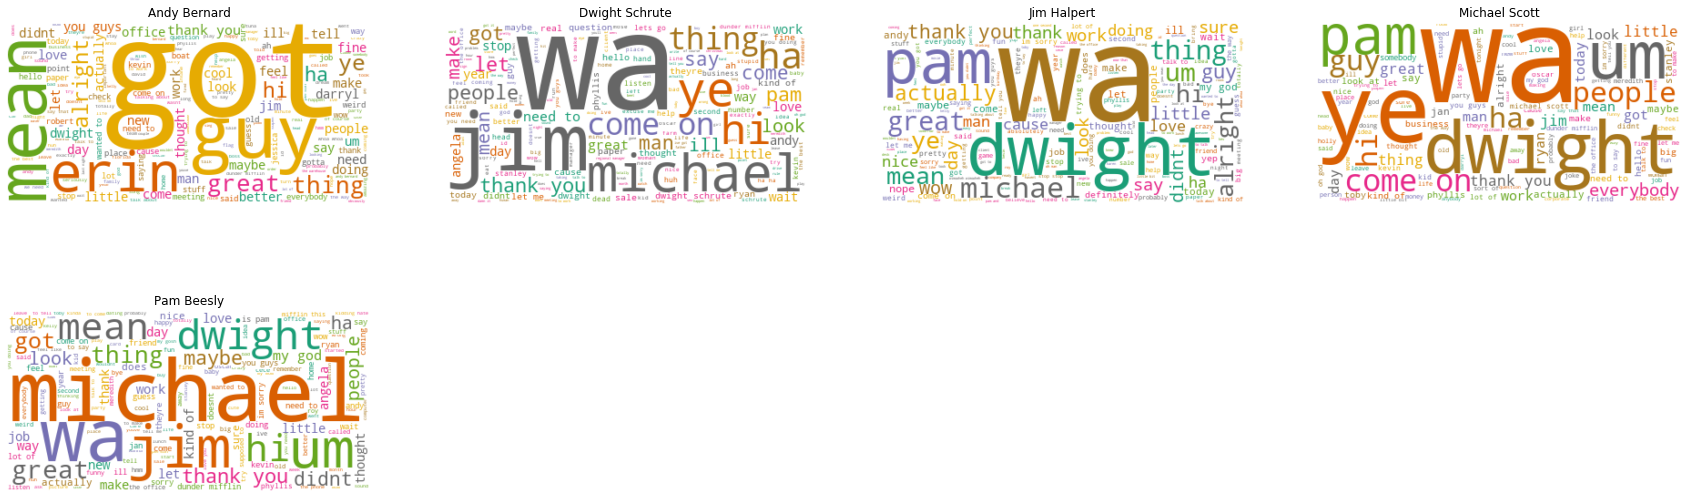

In [43]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 15]

full_names = ['Andy Bernard', 'Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly']

# Create subplots for each comedian
for index, character in enumerate(lines.columns):
    wc.generate(lines_clean.lines[character])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Number of Words

In [44]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for character in lines.columns:
    uniques = lines[character].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
lines_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['character', 'unique_words'])
lines_unique_sort = lines_words.sort_values(by='unique_words')
lines_unique_sort

character  unique_words
0    Andy Bernard          3035
4      Pam Beesly          3981
2     Jim Halpert          4769
1  Dwight Schrute          8127
3   Michael Scott          9393

Text(0.5, 1.0, 'Number of Unique Words')

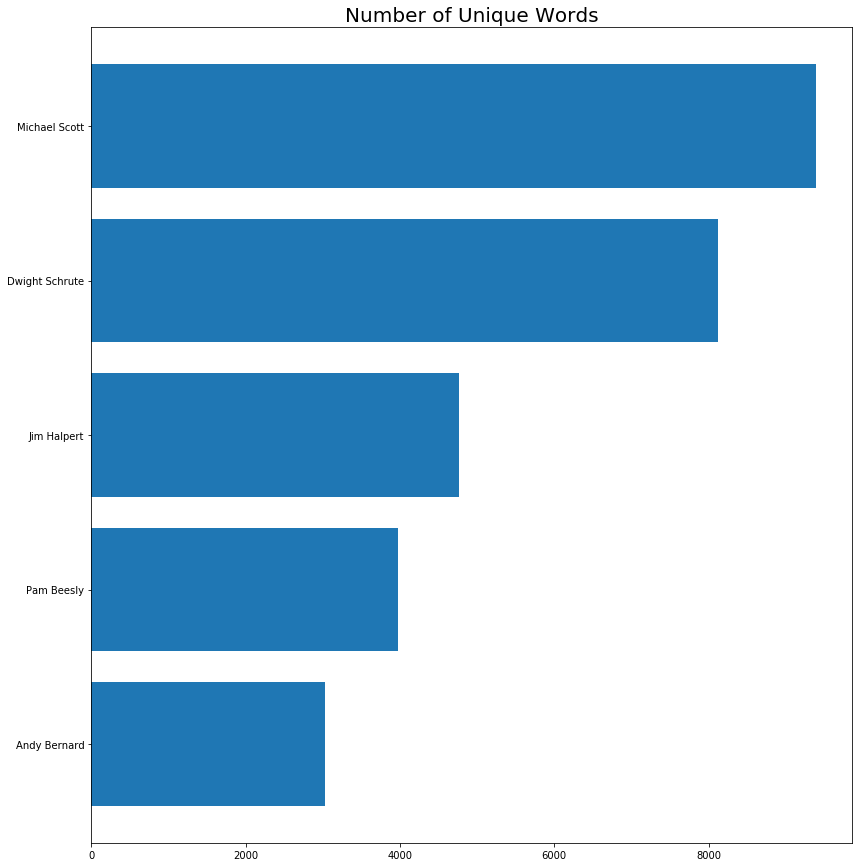

In [45]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(lines_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, lines_unique_sort.unique_words, align='center')
plt.yticks(y_pos, lines_unique_sort.character)
plt.title('Number of Unique Words', fontsize=20)

We can't really conclude anything from this, as Michael Scott probably also has the most lines in the show...

### Amount of Profanity 

In [46]:
lines_bad_words = lines.transpose()[['bleep', 'bitch']]

lines_profanity = pd.concat([lines_bad_words.bleep, lines_bad_words.bitch], axis=1)
lines_profanity.columns = ['bleep', 'bitch']

lines_profanity

bleep  bitch
Andy         0      5
Dwight       2      2
Jim          1      1
Michael      2     18
Pam          0      0

In [47]:
# Let's isolate bad words in the actions
actions_bad_words = actions.transpose()[['bleep']]

actions_profanity = pd.concat([actions_bad_words.bleep], axis=1)
actions_profanity.columns = ['bleep']
actions_profanity

bleep
Andy         4
Dwight       2
Jim          1
Michael      7
Pam          0

In [48]:
# Profanity overall
lines_bad_words = lines.transpose()[['bleep', 'bitch']]
actions_bad_words = actions.transpose()[['bleep']]

profanity = pd.concat([lines_bad_words.bleep + actions_bad_words.bleep, lines_bad_words.bitch], axis=1)
profanity.columns = ['bleep', 'bitch']

profanity

bleep  bitch
Andy         4      5
Dwight       4      2
Jim          2      1
Michael      9     18
Pam          0      0

In [49]:
prof = profanity['bleep'] + profanity['bitch']
names = []
count = []
for key, value in prof.items():
    names.append(key)
    count.append(value)

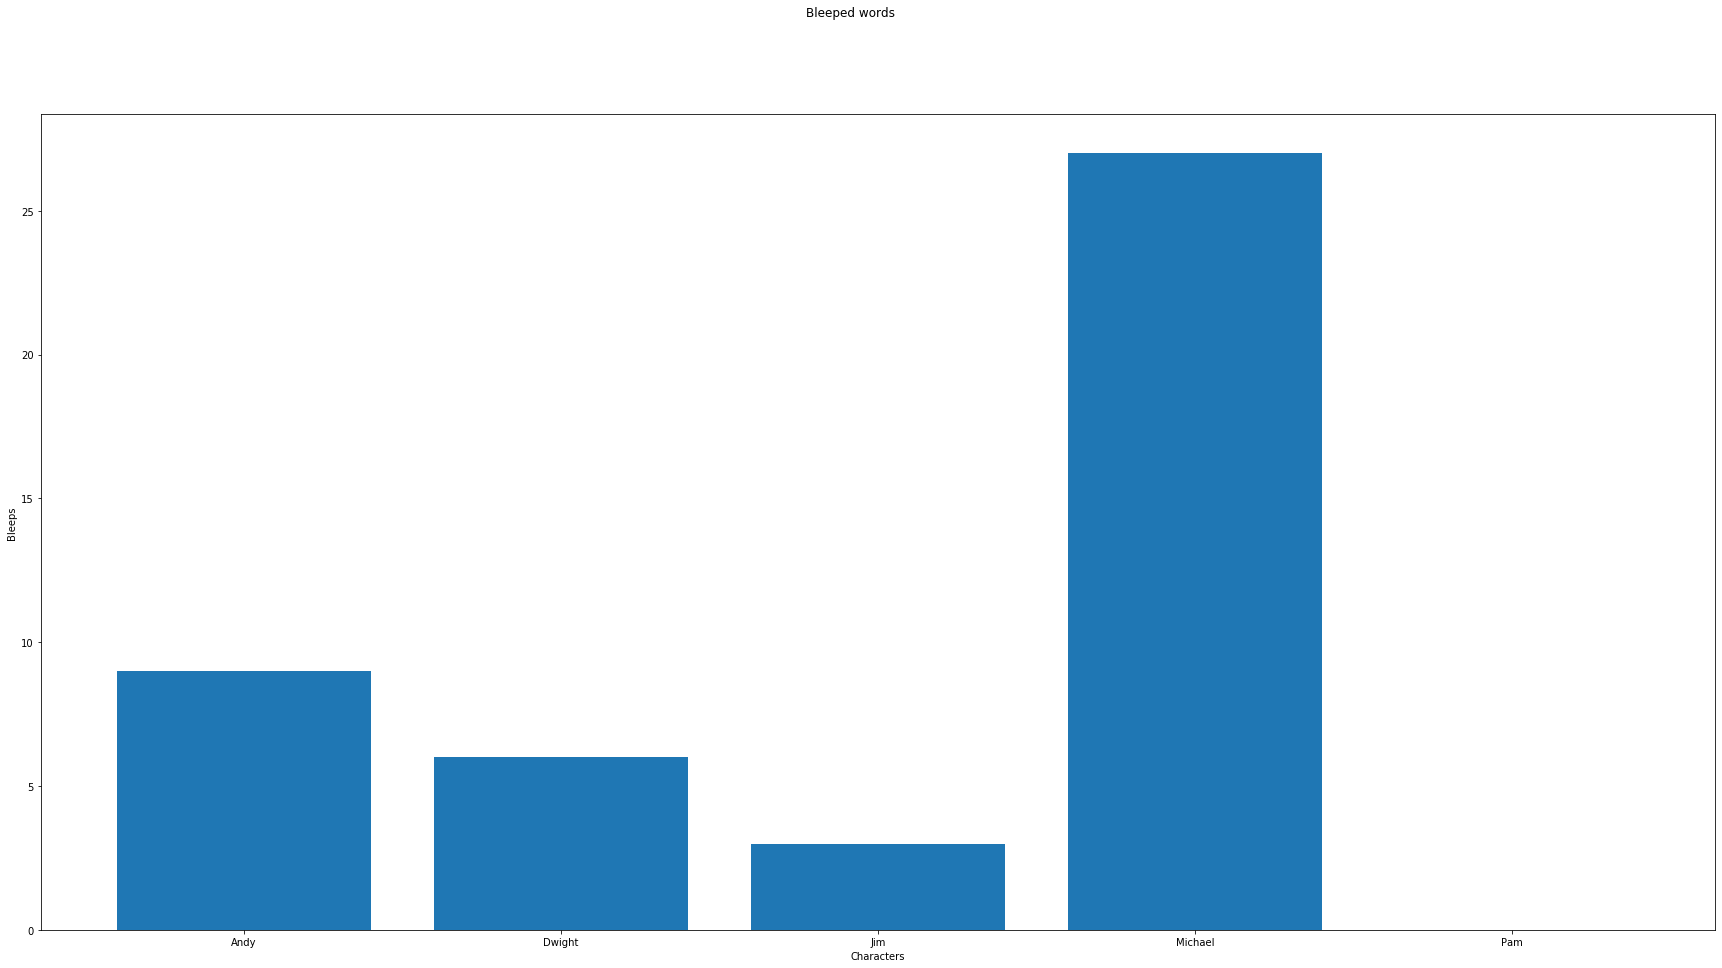

In [50]:
plt.bar(names, count)
plt.suptitle('Bleeped words')
plt.xlabel('Characters')
plt.ylabel('Bleeps')
plt.show()

#### Number of words spoken by each character

In [51]:
print(lines_clean.lines.apply(lambda x : len(x.split())))

Andy        21877
Dwight      83586
Jim         62318
Michael    167556
Pam         47345
Name: lines, dtype: int64


## Sentiment Analysis

### Sentiment of Routine

In [52]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

lines = pd.read_pickle('pickle/lines_corpus.pkl')
lines

lines  \
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...   
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   

             Characters  
Andy       Andy Bernard  
Dwight   Dwight Schrute  
Jim         Jim Halpert  
Michael   Michael Scott  
Pam          Pam Beesly

In [53]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

lines['polarity'] = lines['lines'].apply(pol)
lines['subjectivity'] = lines['lines'].apply(sub)
lines

lines  \
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...   
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   

             Characters  polarity  subjectivity  
Andy       Andy Bernard  0.130747      0.532648  
Dwight   Dwight Schrute  0.141048      0.505843  
Jim         Jim Halpert  0.140890      0.529351  
Michael   Michael Scott  0.167168      0.521001  
Pam          Pam Beesly  0.148947      0.526456

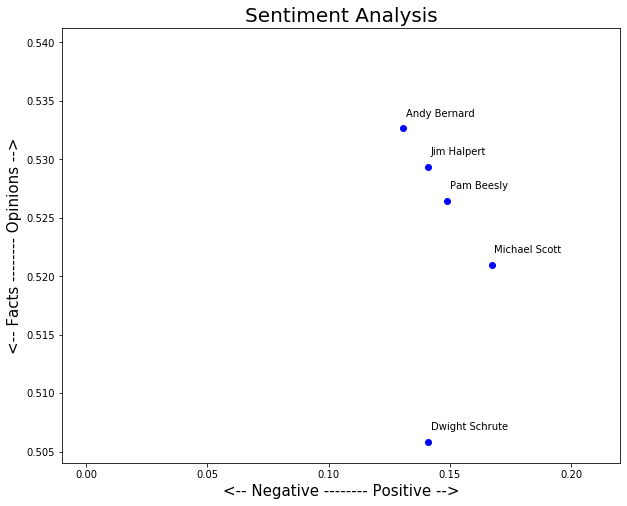

In [54]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, character in enumerate(lines.index):
    x = lines.polarity.loc[character]
    y = lines.subjectivity.loc[character]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, lines['Characters'][index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [55]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [56]:
lines

lines  \
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...   
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   

             Characters  polarity  subjectivity  
Andy       Andy Bernard  0.130747      0.532648  
Dwight   Dwight Schrute  0.141048      0.505843  
Jim         Jim Halpert  0.140890      0.529351  
Michael   Michael Scott  0.167168      0.521001  
Pam          Pam Beesly  0.148947      0.526456

In [57]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in lines.lines:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarify that?No. No, no.Im going in there.I know that every time I talk to you things just seem to get worse. But, you dont know these people and I do. And if I let you work with faulty information, well, then Im not doing my job as regional manager. So, please take this pen and change your list.Well, then I will make a new list for you. Stanley... you may think hes a lazy grump, but did you know that he has the most consistently high sales numbers of anyone in this office? And you may think hes hard to love, but did you know that hes in, not one, but two long-term romantic relationships?Meredith Palmer... Supplier relations. The word no not even in her vocabulary. And just to show you that Im being fair. You had Gabe in the loser column. I think that is astute. Good call. Pam, easily the most creative and kind person I have ever worked with.Eri

In [58]:
# The list has 5 elements, one for each transcript
len(list_pieces)

5

In [59]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1516036230359147,
  0.15294796206932335,
  0.1647798687937577,
  0.19980920024471804,
  0.07054168788727615,
  0.13418825702916612,
  0.17047471422122262,
  0.12109813864450959,
  0.06321387369405664,
  0.1020642133150766],
 [0.173534594511057,
  0.16833816389560885,
  0.11376084553183706,
  0.1560339019716348,
  0.09188723554178274,
  0.12007066983779993,
  0.1595781825925185,
  0.11999420577375196,
  0.16270912133173074,
  0.148397419143686],
 [0.18307983887028023,
  0.16827859841933704,
  0.11861764551662814,
  0.11057159004306648,
  0.13091798644669284,
  0.13584963818338197,
  0.13752177616691047,
  0.16611365129899422,
  0.13298219155956073,
  0.12899266994463182],
 [0.18229437206317212,
  0.17515002570218344,
  0.14933869881073908,
  0.17413283736376003,
  0.16116229690448375,
  0.15360902937255777,
  0.17934593505125457,
  0.13229258693086748,
  0.16919199645051852,
  0.19457498187013192],
 [0.1423294717922527,
  0.13734086687544148,
  0.1329049457486958,
  0.15858835043557

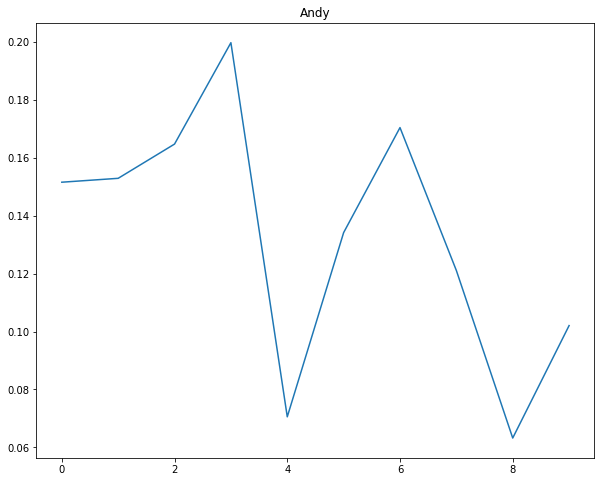

In [60]:
# Show the plot for one character
plt.plot(polarity_transcript[0])
plt.title(lines['Characters'].index[0])
plt.show()

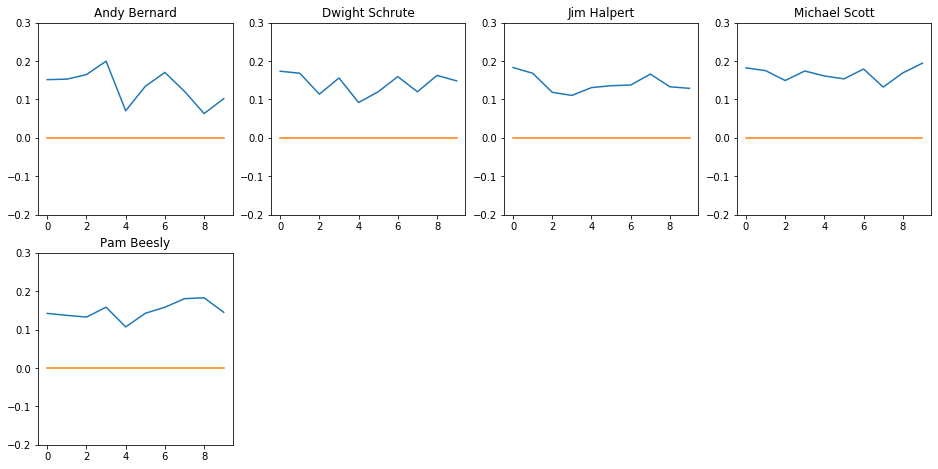

In [61]:
# Show the plot for all characters
plt.rcParams['figure.figsize'] = [16, 12]

for index, character in enumerate(lines.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(lines['Characters'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

## Topic Modeling

In [62]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('pickle/dtm_stop.pkl')
data

aa  aaaaaaaa  aaaaaand  aaaaah  aaaaeeexcellent  aaaagh  aaaah  \
Andy      0         0         0       0                0       0      0   
Dwight    1         6         0       1                0       1      2   
Jim       0         0         0       0                0       0      0   
Michael   0         2         1       0                1       0      1   
Pam       0         0         0       0                0       0      0   

         aaaahh  aaaahhh  aaaall  ...  zombie  zombies  zone  zoning  zoo  \
Andy          0        0       0  ...       0        0     1       1    0   
Dwight        0        0       0  ...       3        1     3       1    3   
Jim           0        0       0  ...       2        1     1       0    0   
Michael       2        1       1  ...       0        1    11       1    1   
Pam           0        0       0  ...       0        0     0       0    0   

         zoom  zooms  zoppity  zoran  zuckerberg  
Andy        0      0        0      0           0  
Dwight      0      0        0      1           1  
Jim         0      0        0      0           0  
Michael     5      1        2      0           0  
Pam         0      0        0      0           0  

[5 rows x 15495 columns]

In [63]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [64]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

Andy  Dwight  Jim  Michael  Pam
aa                  0       1    0        0    0
aaaaaaaa            0       6    0        2    0
aaaaaand            0       0    0        1    0
aaaaah              0       1    0        0    0
aaaaeeexcellent     0       0    0        1    0

In [98]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [66]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("pickle/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [67]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.001*"dwight" + 0.001*"come" + 0.001*"michael" + 0.001*"great" + 0.000*"thank" + 0.000*"pam" + 0.000*"got" + 0.000*"need" + 0.000*"say" + 0.000*"little"'),
 (1,
  '0.007*"dwight" + 0.007*"michael" + 0.007*"come" + 0.006*"jim" + 0.005*"got" + 0.005*"pam" + 0.005*"say" + 0.005*"need" + 0.005*"great" + 0.005*"um"')]

In [68]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.009*"michael" + 0.007*"dwight" + 0.007*"jim" + 0.006*"got" + 0.006*"come" + 0.005*"great" + 0.005*"need" + 0.005*"say" + 0.005*"thank" + 0.005*"pam"'),
 (1,
  '0.001*"michael" + 0.001*"jim" + 0.001*"dwight" + 0.001*"come" + 0.001*"got" + 0.000*"need" + 0.000*"say" + 0.000*"people" + 0.000*"great" + 0.000*"pam"'),
 (2,
  '0.007*"come" + 0.006*"people" + 0.006*"dwight" + 0.006*"pam" + 0.005*"say" + 0.005*"look" + 0.005*"need" + 0.005*"lets" + 0.005*"everybody" + 0.005*"little"')]

In [69]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.009*"dwight" + 0.006*"got" + 0.006*"great" + 0.006*"alright" + 0.006*"mean" + 0.006*"pam" + 0.005*"guys" + 0.004*"wow" + 0.004*"actually" + 0.004*"sorry"'),
 (1,
  '0.001*"michael" + 0.001*"come" + 0.001*"great" + 0.001*"need" + 0.001*"got" + 0.001*"jim" + 0.001*"dwight" + 0.001*"way" + 0.001*"lets" + 0.001*"god"'),
 (2,
  '0.012*"michael" + 0.009*"jim" + 0.006*"come" + 0.006*"got" + 0.005*"dwight" + 0.005*"hes" + 0.005*"need" + 0.004*"say" + 0.004*"thank" + 0.004*"great"'),
 (3,
  '0.008*"come" + 0.007*"dwight" + 0.006*"people" + 0.006*"pam" + 0.006*"say" + 0.005*"need" + 0.005*"um" + 0.005*"lets" + 0.005*"look" + 0.005*"got"')]

### Attempt 2

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

In [70]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [71]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('pickle/lines_clean.pkl')
data_clean

lines
Andy     robert  i said winners and losers  is that what youre talking about oh  that  it might  that might actually be what im thinking of  can you clarif...
Dwight    shall i play for you  pa rum pump um pum  i have no gifts for you  pa rum pump um pum whassup whassup what just clearing my desk  i cant concentr...
Jim      oh  i told you  i couldnt close it  so   actually  you called me in here  but yeah my job is to speak to clients on the phone about    uh  quantit...
Michael  all right jim  your quarterlies look very good  how are things at the library so youve come to the master for guidance  is this what youre saying ...
Pam      well  i dont know what uh  yeah  just a fax you havent told me uh  yeah  the one   you put in the garbage can that was a special filing cabinet i ...

In [72]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(lines_clean.lines.apply(nouns))
data_nouns

lines
Andy     robert i winners losers youre oh thinking im i time talk things people information job manager pen list list hes grump sales numbers anyone office...
Dwight   play pump pum i gifts pump pum whassup desk i spilling edge word syllables demarcation safety violation i i problem i i interview i im manager i u...
Jim      oh i job clients phone quantities type paper whassup i years nothing care yes stop mr davis something minutes desk downsizing thing i information ...
Michael  jim quarterlies things library master guidance youre id office manager hello scott i manager dunder paper products manager manger deal thank sir y...
Pam      yeah fax garbage filing cabinet i question cat party sunday scott i thing i girls dream receptionist i illustrations oil pencil um jim dunder miff...

In [73]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.lines)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

aaaaaaaa  aaaaah  aaaagh  aaaah  aaaahh  aaaahhh  aaaarrhh  aaagh  \
Andy            0       0       0      0       0        0         0      0   
Dwight          4       1       1      1       0        0         1      1   
Jim             0       0       0      0       0        0         0      0   
Michael         0       0       0      0       1        1         0      0   
Pam             0       0       0      0       0        0         0      0   

         aaah  aaahhh  ...  zit  zits  zombie  zombies  zone  zoo  zoom  \
Andy        1       0  ...    0     0       0        0     1    0     0   
Dwight      1       0  ...    1     0       3        1     2    3     0   
Jim         0       0  ...    0     0       1        1     1    0     0   
Michael     2       1  ...    1     1       0        1     7    1     2   
Pam         0       0  ...    0     0       0        0     0    0     0   

         zooms  zoppity  zuckerberg  
Andy         0        0           0  
Dwight       0        0           1  
Jim          0        0           0  
Michael      1        2           0  
Pam          0        0           0  

[5 rows x 9711 columns]

In [74]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [75]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"okay" + 0.009*"hey" + 0.007*"day" + 0.007*"everybody" + 0.007*"thing" + 0.007*"pam" + 0.006*"way" + 0.006*"man" + 0.006*"office" + 0.006*"jim"'),
 (1,
  '0.011*"hey" + 0.011*"michael" + 0.010*"jim" + 0.008*"okay" + 0.007*"way" + 0.007*"thing" + 0.006*"day" + 0.006*"man" + 0.006*"hes" + 0.006*"gon"')]

In [76]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"jim" + 0.009*"michael" + 0.006*"man" + 0.006*"way" + 0.006*"hey" + 0.005*"thing" + 0.005*"hes" + 0.005*"office" + 0.005*"okay" + 0.005*"lets"'),
 (1,
  '0.001*"michael" + 0.000*"way" + 0.000*"jim" + 0.000*"hey" + 0.000*"day" + 0.000*"gon" + 0.000*"pam" + 0.000*"thing" + 0.000*"office" + 0.000*"hes"'),
 (2,
  '0.013*"hey" + 0.010*"okay" + 0.008*"day" + 0.008*"thing" + 0.007*"michael" + 0.007*"jim" + 0.007*"way" + 0.007*"dwight" + 0.007*"pam" + 0.006*"office"')]

In [77]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"michael" + 0.010*"hey" + 0.009*"jim" + 0.008*"okay" + 0.008*"man" + 0.007*"way" + 0.007*"thing" + 0.007*"pam" + 0.006*"gon" + 0.006*"day"'),
 (1,
  '0.001*"jim" + 0.001*"hey" + 0.001*"michael" + 0.001*"okay" + 0.001*"way" + 0.001*"thing" + 0.001*"office" + 0.001*"man" + 0.001*"day" + 0.000*"lets"'),
 (2,
  '0.001*"hey" + 0.001*"michael" + 0.001*"jim" + 0.001*"man" + 0.001*"okay" + 0.000*"thing" + 0.000*"dwight" + 0.000*"day" + 0.000*"way" + 0.000*"office"'),
 (3,
  '0.011*"hey" + 0.009*"okay" + 0.008*"jim" + 0.008*"day" + 0.008*"thing" + 0.007*"way" + 0.007*"office" + 0.006*"michael" + 0.006*"everybody" + 0.006*"god"')]

### Attempt 3

In [78]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [79]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.lines.apply(nouns_adj))
data_nouns_adj

lines
Andy     robert i winners losers youre oh im thinking im i time i talk things worse people i faulty information job regional manager please pen list new li...
Dwight   play rum pump um pum i gifts rum pump um pum whassup desk i spilling edge word syllables demarcation safety violation i organ i problem i i interv...
Jim      oh i close job clients phone uh quantities type copier paper whassup i years nothing care yes stop ridiculous sure mr davis right something minute...
Michael  right jim quarterlies good things library master guidance youre grasshopper id office manager hello michael scott i regional manager dunder paper ...
Pam      i uh yeah fax uh garbage special filing cabinet i important question cat party sunday mr scott i worst thing i dont many little girls dream recept...

In [80]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.lines)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

aaaaaaaa  aaaaah  aaaaeeexcellent  aaaagh  aaaah  aaaahh  aaaahhh  \
Andy            0       0                0       0      0       0        0   
Dwight          4       1                0       1      1       0        0   
Jim             0       0                0       0      0       0        0   
Michael         0       0                1       0      1       1        1   
Pam             0       0                0       0      0       0        0   

         aaaarrhh  aaagh  aaah  ...  zit  zits  zombie  zombies  zone  zoo  \
Andy            0      0     1  ...    0     0       0        0     1    0   
Dwight          1      2     2  ...    1     0       3        1     2    3   
Jim             0      0     1  ...    0     0       2        1     1    0   
Michael         0      0     3  ...    1     1       0        1     7    1   
Pam             0      0     0  ...    0     0       0        0     0    0   

         zoom  zooms  zoppity  zuckerberg  
Andy        0      0        0           0  
Dwight      0      0        0           1  
Jim         0      0        0           0  
Michael     2      1        2           0  
Pam         0      0        0           0  

[5 rows x 11296 columns]

In [81]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [82]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"scott" + 0.002*"york" + 0.002*"packer" + 0.002*"black" + 0.002*"clients" + 0.001*"date" + 0.001*"blah" + 0.001*"smart" + 0.001*"boom" + 0.001*"fat"'),
 (1,
  '0.002*"wedding" + 0.002*"date" + 0.002*"black" + 0.002*"roy" + 0.002*"building" + 0.001*"hospital" + 0.001*"mose" + 0.001*"jims" + 0.001*"scott" + 0.001*"clients"')]

In [83]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"wimowheh" + 0.002*"tuna" + 0.002*"hospital" + 0.001*"date" + 0.001*"clients" + 0.001*"karen" + 0.001*"agent" + 0.001*"prank" + 0.001*"roy" + 0.001*"kev"'),
 (1,
  '0.002*"wedding" + 0.002*"black" + 0.002*"building" + 0.002*"date" + 0.002*"jims" + 0.002*"mose" + 0.001*"roy" + 0.001*"boom" + 0.001*"chair" + 0.001*"power"'),
 (2,
  '0.004*"scott" + 0.002*"york" + 0.002*"packer" + 0.002*"black" + 0.002*"clients" + 0.002*"date" + 0.002*"blah" + 0.002*"smart" + 0.002*"boom" + 0.001*"busy"')]

In [84]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"scott" + 0.003*"york" + 0.002*"date" + 0.002*"wedding" + 0.002*"roy" + 0.002*"hospital" + 0.002*"black" + 0.002*"clients" + 0.002*"smart" + 0.002*"busy"'),
 (1,
  '0.000*"scott" + 0.000*"date" + 0.000*"york" + 0.000*"busy" + 0.000*"clients" + 0.000*"wedding" + 0.000*"mose" + 0.000*"black" + 0.000*"hospital" + 0.000*"boom"'),
 (2,
  '0.002*"black" + 0.002*"mose" + 0.002*"boom" + 0.001*"power" + 0.001*"security" + 0.001*"clients" + 0.001*"building" + 0.001*"penis" + 0.001*"ow" + 0.001*"blah"'),
 (3,
  '0.000*"scott" + 0.000*"clients" + 0.000*"date" + 0.000*"black" + 0.000*"wedding" + 0.000*"york" + 0.000*"smart" + 0.000*"decision" + 0.000*"blah" + 0.000*"power"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [85]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=60)
ldana.print_topics()

[(0,
  '0.002*"black" + 0.002*"mose" + 0.002*"boom" + 0.001*"power" + 0.001*"security" + 0.001*"penis" + 0.001*"building" + 0.001*"clients" + 0.001*"horse" + 0.001*"temp"'),
 (1,
  '0.005*"wedding" + 0.004*"roy" + 0.003*"art" + 0.003*"jims" + 0.003*"mural" + 0.002*"date" + 0.002*"chair" + 0.002*"building" + 0.002*"hospital" + 0.002*"pictures"'),
 (2,
  '0.000*"black" + 0.000*"building" + 0.000*"date" + 0.000*"scott" + 0.000*"clients" + 0.000*"hospital" + 0.000*"busy" + 0.000*"york" + 0.000*"wedding" + 0.000*"power"'),
 (3,
  '0.004*"scott" + 0.003*"york" + 0.002*"clients" + 0.002*"date" + 0.002*"black" + 0.002*"packer" + 0.002*"smart" + 0.002*"hospital" + 0.002*"busy" + 0.001*"roy"')]

These topics look shit... We need to try and get some better ones.

In [86]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'Andy'), (0, 'Dwight'), (3, 'Jim'), (3, 'Michael'), (1, 'Pam')]

# Text Generation

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Dwight Schrute, so as a first step, let's extract the text from his lines.

In [87]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('pickle/lines_corpus.pkl')
data

lines  \
Andy     Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...   
Dwight    Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...   
Jim      Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...   
Michael  All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...   
Pam      Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....   

             Characters  
Andy       Andy Bernard  
Dwight   Dwight Schrute  
Jim         Jim Halpert  
Michael   Michael Scott  
Pam          Pam Beesly

In [88]:
# Extract only Dwight's text
dwight_text = data.lines.loc['Dwight']
dwight_text[:200]

" Shall I play for you? Pa rum pump um pum  I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concentrate.It's overlapping. It's all spilling over the edge"

In [89]:
# Extract only Pam's text
pam_text = data.lines.loc['Pam']
pam_text[:200]

"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet.I have an important question for you.Are you going to "

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:

The keys should be all of the words in the corpus
The values should be a list of the words that follow the keys

In [90]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [91]:
# Create the dictionary for Dwight's lines, take a look at it
dwight_dict = markov_chain(dwight_text)
dwight_dict

{'': ['Shall',
  'I',
  'Can',
  'This',
  'I',
  "It's...I'm",
  "I'm",
  'So,',
  'I',
  'Bigger',
  "'Count",
  'Thank',
  'Pam,',
  'But',
  'God.',
  'Mmm.It',
  '',
  'De-fense!',
  'Yeah!',
  'In',
  'You',
  'Okay,',
  'Mmm,',
  'Good.',
  'You',
  "It's",
  'From',
  'Devon!The',
  'Out.',
  'Well,',
  'Terminator.Which',
  'Can',
  'We',
  'Cancel',
  'Oh,',
  'Ryan',
  '...',
  'What',
  'Oh',
  "I'm",
  "I'm",
  'Michael,',
  'This',
  'We',
  'And',
  'I',
  'I',
  'They',
  'I',
  'Now',
  'Sam,',
  'And',
  'Wait,',
  "That's",
  'My',
  'Anyone',
  'Michael?',
  '',
  'Michael?',
  '',
  'His',
  'I',
  "Who's",
  'Jan?Did',
  'It',
  'Forget',
  'Sorry.Numerous',
  'see,',
  "Here's",
  'So,',
  'What',
  'I',
  'I',
  'Uh,',
  'Who',
  'Who',
  'Crap!',
  'I',
  'I',
  'Yes!',
  'Yes!',
  'The',
  'Yes!',
  'Why',
  'Why?',
  'Because...',
  'Oh',
  'Let',
  'I',
  'Also,',
  'Even',
  'I',
  'And',
  "It's",
  'So',
  'And',
  "That's",
  'What',
  'What',
  'You',
 

In [92]:
# Create the dictionary for Pam's lines, take a look at it
pam_dict = markov_chain(pam_text)
pam_dict

{'Well.': ['I'],
 'I': ["don't",
  'might...',
  "don't",
  'like',
  'think',
  'go',
  'still',
  'supposed',
  'mean',
  'have',
  'thought',
  'saw',
  'like',
  'like',
  'have',
  'do',
  'gave',
  'have',
  'told',
  'get',
  'suggested',
  "wouldn't",
  'talk',
  "don't",
  'keep',
  'just',
  'want',
  'just',
  'could',
  'really',
  'should',
  'know',
  "can't",
  'think',
  'though',
  "don't",
  'told',
  'gave',
  "can't",
  'really',
  'was',
  'think',
  'like',
  "swear.We're",
  "don't",
  "don't",
  'just,',
  'decided',
  'get',
  "haven't",
  'have',
  "couldn't",
  'want',
  'feel',
  'wrote',
  'ask',
  'just',
  'am',
  'keep',
  'just',
  'can',
  'used',
  'moved',
  'uh...',
  'switched',
  'actually',
  'kind',
  'am',
  'send',
  'realize',
  'think',
  'try',
  'changed',
  'changed',
  'know',
  'found',
  'swear,',
  'ask',
  'guess',
  "don't",
  'feel',
  'talking',
  'kind',
  'bet',
  'were',
  'made',
  'will,',
  'mean,',
  'was...Oh,',
  'would',

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary we just created
* The number of words we want generated


In [99]:
import random

def generate_sentence(chain, count=10):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [94]:
generate_sentence(dwight_dict)

"Eine Brise blasendTake it if you'll never escape.I would you."

###### Here are some of Dwight's generated sentences:

> 'Singing audition.I put it with some gluhwein, enjoy laughing at?Are you tell you, so doing.'

> 'Seriously? Oh, wow, Pam was not here, come in tune with Esther now. There are.'

> 'Michael! really funny, Jim! Yes. I don't care, Pam? 'Cause Ryan to enter here! To intimidate my heart. OK.'

> 'Hmmm?  You live here at a practitioner of experiencing the roast skunk. Angela? Would you.'

> 'Motivated by Weyer-Hammer Paper Incorporated. Awards, multiple Dundies. She had your office? That guy is over! Now.'

> 'And... boom.  Groin punch, hip bone! Don't.'

> 'Halpert!stop forgetting things.MR. JAMES HALPERT!Stop forgetting.'

In [95]:
generate_sentence(pam_dict)

'Great.i went in there.  Dunder Mifflin.Thats what are you.'

###### Here are some of Pam's generated lines

> 'Rule about him-- or Philadelphia.Okay.Thanks.Hi, nice meal with Ryan?Michael, you have a great time.'

> 'Dollars.you know, when they put your phone call, he is.Is it on---...noooo It's actually fire.'

> 'Terrified of his early attempts at you, but that would.'

> 'Cici has feelings too, and stuff. And on top of that.'